In [ ]:
#NDTA631 - Group Assignment
# Member: Goitseone Mogokotleng, 202205210

# DATA ANALYSIS, PART 5

In [1]:
import pandas as pd

df1 = pd.read_csv("cleaned_dataset1.csv")
df2 = pd.read_csv("cleaned_dataset2.csv")

print("Dataset 1:", df1.shape)
print(df1.head(), "\n")
print("Dataset 2:", df2.shape)
print(df2.head())


Dataset 1: (35, 7)
  REF_AREA REF_AREA_LABEL                                   INDICATOR_LABEL  \
0      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
1      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
2      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
3      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
4      ZAF   South Africa  Used a mobile phone or the internet to pay bills   

  SEX     AGE  TIME_PERIOD  OBS_VALUE  
0  _T  Y_GE15         2017  10.124896  
1  _T  Y_GE15         2021  27.613656  
2  _T  Y_GE15         2024  20.810049  
3   M  Y_GE15         2017  11.142022  
4   F  Y_GE15         2017   9.171838   

Dataset 2: (46, 7)
  REF_AREA REF_AREA_LABEL       INDICATOR_LABEL SEX     AGE  TIME_PERIOD  \
0      ZAF   South Africa  Mobile money account  _T  Y_GE15         2014   
1      ZAF   South Africa  Mobile money account  _T  Y_GE15         2017   
2      ZAF   Sout

In [5]:

df1.columns = df1.columns.str.strip().str.upper()
df2.columns = df2.columns.str.strip().str.upper()

df1 = df1.fillna(0)
df2 = df2.fillna(0)


merged = pd.merge(
    df1, df2,
    on=["TIME_PERIOD", "SEX", "AGE", "REF_AREA", "REF_AREA_LABEL"],
    suffixes=("_D1", "_D2")
)

print("Merged dataset shape:", merged.shape)
print(merged.head())


Merged dataset shape: (191, 9)
  REF_AREA REF_AREA_LABEL                                INDICATOR_LABEL_D1  \
0      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
1      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
2      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
3      ZAF   South Africa  Used a mobile phone or the internet to pay bills   
4      ZAF   South Africa  Used a mobile phone or the internet to pay bills   

  SEX     AGE  TIME_PERIOD  OBS_VALUE_D1    INDICATOR_LABEL_D2  OBS_VALUE_D2  
0  _T  Y_GE15         2017     10.124896  Mobile money account     19.016846  
1  _T  Y_GE15         2017     10.124896  Mobile money account     23.623279  
2  _T  Y_GE15         2017     10.124896  Mobile money account     12.060667  
3  _T  Y_GE15         2017     10.124896  Mobile money account     11.234506  
4  _T  Y_GE15         2017     10.124896  Mobile money account     28.795787  


In [6]:
!pip install openpyxl



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill


In [8]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
import numpy as np

excel_file = "Q5_DataAnalysis.xlsx"
merged.to_excel(excel_file, index=False, sheet_name="Analysis")

wb = load_workbook(excel_file)
ws = wb["Analysis"]

# Apply conditional formatting
for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=ws.min_column, max_col=ws.max_column):
    for cell in row:
        if isinstance(cell.value, (int, float)):
            if cell.value > 30:
                cell.fill = PatternFill(start_color="FF9999", end_color="FF9999", fill_type="solid")  # red
            elif cell.value < 10:
                cell.fill = PatternFill(start_color="99FF99", end_color="99FF99", fill_type="solid")  # green

wb.save(excel_file)
print("Excel file saved with conditional formatting:", excel_file)


Excel file saved with conditional formatting: Q5_DataAnalysis.xlsx


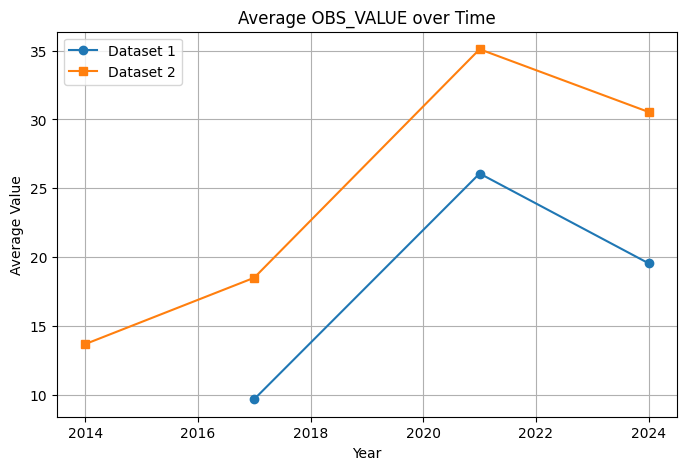

In [7]:
import matplotlib.pyplot as plt

# Compare average OBS_VALUE per year (dataset1 vs dataset2)
avg_df1 = df1.groupby("TIME_PERIOD")["OBS_VALUE"].mean()
avg_df2 = df2.groupby("TIME_PERIOD")["OBS_VALUE"].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_df1.index, avg_df1.values, marker="o", label="Dataset 1")
plt.plot(avg_df2.index, avg_df2.values, marker="s", label="Dataset 2")

plt.title("Average OBS_VALUE over Time")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()


## Findings from Data Analysis

- **Dataset 1 (Internet/Mobile Bill Payments)**  
  Adoption increased from ~10% in 2017 to ~26% in 2021, but slightly dropped to ~19% in 2024.  

- **Dataset 2 (Mobile Money Accounts)**  
  Higher adoption levels: ~18% in 2017, peaking at ~35% in 2021, then decreasing slightly to ~30% in 2024.  

- **Comparison**  
  Mobile money accounts are consistently **more widely adopted** than mobile/Internet bill payments.  
  Both datasets show a dip after 2021, possibly due to economic or social factors.


In [1]:
print("Summary of Findings:")
print("- Dataset 1 (Internet/Mobile Bill Payments): grew from ~10% in 2017 to ~26% in 2021, but dropped to ~19% in 2024.")
print("- Dataset 2 (Mobile Money Accounts): started at ~18% in 2017, peaked at ~35% in 2021, then fell slightly to ~30% in 2024.")
print("- Comparison: Mobile money accounts consistently have higher adoption rates than mobile bill payments.")


Summary of Findings:
- Dataset 1 (Internet/Mobile Bill Payments): grew from ~10% in 2017 to ~26% in 2021, but dropped to ~19% in 2024.
- Dataset 2 (Mobile Money Accounts): started at ~18% in 2017, peaked at ~35% in 2021, then fell slightly to ~30% in 2024.
- Comparison: Mobile money accounts consistently have higher adoption rates than mobile bill payments.
